In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
CCTV_Seoul = pd.read_excel('01.CCTV_in_Seoul.xlsx', encoding='utf-8')
CCTV_Seoul.head()

,District,Total,Before 2013,2014,2015,2016
0,Gangnam District,3238,1292,430,584,932
1,Gangdong District,1010,379,99,155,377
2,Gangbuk District,831,369,120,138,204
3,Gangseo District,911,388,258,184,81
4,Gwanak District,2109,846,260,390,613


In [3]:
CCTV_Seoul.rename(columns={CCTV_Seoul.columns[0]:'District(Gu)',}, inplace=True)
CCTV_Seoul.head()

,District(Gu),Total,Before 2013,2014,2015,2016
0,Gangnam District,3238,1292,430,584,932
1,Gangdong District,1010,379,99,155,377
2,Gangbuk District,831,369,120,138,204
3,Gangseo District,911,388,258,184,81
4,Gwanak District,2109,846,260,390,613


In [4]:
CCTV_Seoul['3y growth rate'] = (CCTV_Seoul[2016] + CCTV_Seoul[2015] + 
                          CCTV_Seoul[2014]) / CCTV_Seoul['Before 2013']  * 100
CCTV_Seoul.sort_values(by='3y growth rate', ascending=False).head(5)

,District(Gu),Total,Before 2013,2014,2015,2016,3y growth rate
22,Jongno District,1619,464,314,211,630,248.922414
9,Dobong District,825,238,159,42,386,246.638655
12,Mapo District,980,314,118,169,379,212.101911
8,Nowon District,1566,542,57,451,516,188.929889
1,Gangdong District,1010,379,99,155,377,166.490765


In [5]:
pop_Seoul = pd.read_excel('01.population_in_Seoul.xls',
                         header = 2, # 세 번째 줄부터 읽어라
                         parse_cols = 'B, D, G, J, N',
                         encoding='utf-8')
pop_Seoul.head()

C:\Users\chanl\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: the 'parse_cols' keyword is deprecated, use 'usecols' instead
  after removing the cwd from sys.path.


,자치구,계,계.1,계.2,65세이상고령자
0,합계,10197604.0,9926968.0,270636.0,1321458.0
1,Jongno District,162820.0,153589.0,9231.0,25425.0
2,Jung District,133240.0,124312.0,8928.0,20764.0
3,Yongsan District,244203.0,229456.0,14747.0,36231.0
4,Seongdong District,311244.0,303380.0,7864.0,39997.0


In [6]:
pop_Seoul.rename(columns={pop_Seoul.columns[0] : 'District(Gu)',
                        pop_Seoul.columns[1] : 'population',
                        pop_Seoul.columns[2] : 'Korean',
                        pop_Seoul.columns[3] : 'Foreigner',
                        pop_Seoul.columns[4] : 'over 65'}, inplace=True)
pop_Seoul.head()

,District(Gu),population,Korean,Foreigner,over 65
0,합계,10197604.0,9926968.0,270636.0,1321458.0
1,Jongno District,162820.0,153589.0,9231.0,25425.0
2,Jung District,133240.0,124312.0,8928.0,20764.0
3,Yongsan District,244203.0,229456.0,14747.0,36231.0
4,Seongdong District,311244.0,303380.0,7864.0,39997.0


In [7]:
pop_Seoul.drop([0], inplace=True)     
pop_Seoul.head()

,District(Gu),population,Korean,Foreigner,over 65
1,Jongno District,162820.0,153589.0,9231.0,25425.0
2,Jung District,133240.0,124312.0,8928.0,20764.0
3,Yongsan District,244203.0,229456.0,14747.0,36231.0
4,Seongdong District,311244.0,303380.0,7864.0,39997.0
5,Gwangjin District,372164.0,357211.0,14953.0,42214.0


In [8]:
pop_Seoul['District(Gu)'].unique()

array(['Jongno District\xa0', 'Jung District\xa0', 'Yongsan District\xa0',
       'Seongdong District\xa0', 'Gwangjin District',
       'Dongdaemun District\xa0', 'Jungnang District',
       'Seongbuk District\xa0', 'Gangbuk District', 'Dobong District',
       'Nowon District', 'Eunpyeong District\xa0', 'Seodaemun District',
       'Mapo District', 'Yangcheon District', 'Gangseo District',
       'Guro District', 'Geumcheon District', 'Yeongdeungpo District',
       'Dongjak District', 'Gwanak District', 'Seocho District',
       'Gangnam District', 'Songpa District', 'Gangdong District', nan],
      dtype=object)

In [9]:
pop_Seoul[pop_Seoul['District(Gu)'].isnull()]

,District(Gu),population,Korean,Foreigner,over 65
26,NaN,NaN,NaN,NaN,NaN


In [10]:
pop_Seoul.drop([26], inplace=True)
pop_Seoul.head()

,District(Gu),population,Korean,Foreigner,over 65
1,Jongno District,162820.0,153589.0,9231.0,25425.0
2,Jung District,133240.0,124312.0,8928.0,20764.0
3,Yongsan District,244203.0,229456.0,14747.0,36231.0
4,Seongdong District,311244.0,303380.0,7864.0,39997.0
5,Gwangjin District,372164.0,357211.0,14953.0,42214.0


In [11]:
pop_Seoul['Foreigner rate'] = pop_Seoul['Foreigner'] / pop_Seoul['population'] * 100
pop_Seoul['over 65 rate'] = pop_Seoul['over 65'] / pop_Seoul['population'] * 100
pop_Seoul.head()

,District(Gu),population,Korean,Foreigner,over 65,Foreigner rate,over 65 rate
1,Jongno District,162820.0,153589.0,9231.0,25425.0,5.669451,15.615404
2,Jung District,133240.0,124312.0,8928.0,20764.0,6.700690,15.583909
3,Yongsan District,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427
4,Seongdong District,311244.0,303380.0,7864.0,39997.0,2.526635,12.850689
5,Gwangjin District,372164.0,357211.0,14953.0,42214.0,4.017852,11.342849


In [12]:
data_result = pd.merge(CCTV_Seoul, pop_Seoul, on='District(Gu)')
data_result.head()

,District(Gu),Total,Before 2013,2014,2015,2016,3y growth rate,population,Korean,Foreigner,over 65,Foreigner rate,over 65 rate
0,Gangnam District,3238,1292,430,584,932,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
1,Gangdong District,1010,379,99,155,377,166.490765,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638
2,Gangbuk District,831,369,120,138,204,125.203252,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
3,Gangseo District,911,388,258,184,81,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
4,Gwanak District,2109,846,260,390,613,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


In [13]:
del data_result['Before 2013']
del data_result[2014]    
del data_result[2015]
del data_result[2016]

data_result.head()

,District(Gu),Total,3y growth rate,population,Korean,Foreigner,over 65,Foreigner rate,over 65 rate
0,Gangnam District,3238,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
1,Gangdong District,1010,166.490765,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638
2,Gangbuk District,831,125.203252,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
3,Gangseo District,911,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
4,Gwanak District,2109,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


In [14]:
data_result.set_index('District(Gu)', inplace=True)
data_result.head()

,Total,3y growth rate,population,Korean,Foreigner,over 65,Foreigner rate,over 65 rate
District(Gu),,,,,,,,
Gangnam District,3238,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
Gangdong District,1010,166.490765,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638
Gangbuk District,831,125.203252,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
Gangseo District,911,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
Gwanak District,2109,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


In [15]:
np.corrcoef(data_result['over 65 rate'], data_result['Total']) 

array([[ 1.        , -0.25866272],
       [-0.25866272,  1.        ]])

In [16]:
np.corrcoef(data_result['Foreigner rate'], data_result['Total'])

array([[ 1.        , -0.05230165],
       [-0.05230165,  1.        ]])

In [17]:
np.corrcoef(data_result['population'], data_result['Total'])

array([[1.       , 0.2432198],
       [0.2432198, 1.       ]])

In [18]:
data_result.sort_values(by='Total', ascending=False).head()

,Total,3y growth rate,population,Korean,Foreigner,over 65,Foreigner rate,over 65 rate
District(Gu),,,,,,,,
Gangnam District,3238,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
Yangcheon District,2482,34.671731,479978.0,475949.0,4029.0,52975.0,0.839413,11.036964
Seocho District,2297,63.371266,450310.0,445994.0,4316.0,51733.0,0.958451,11.488308
Gwanak District,2109,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291
Eunpyeong District,2108,85.237258,494388.0,489943.0,4445.0,72334.0,0.899091,14.631019


In [19]:
data_result.sort_values(by='population', ascending=False).head()

,Total,3y growth rate,population,Korean,Foreigner,over 65,Foreigner rate,over 65 rate
District(Gu),,,,,,,,
Songpa District,1081,104.347826,667483.0,660584.0,6899.0,72506.0,1.033584,10.862599
Gangseo District,911,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
Gangnam District,3238,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
Nowon District,1566,188.929889,569384.0,565565.0,3819.0,71941.0,0.670725,12.634883
Gwanak District,2109,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


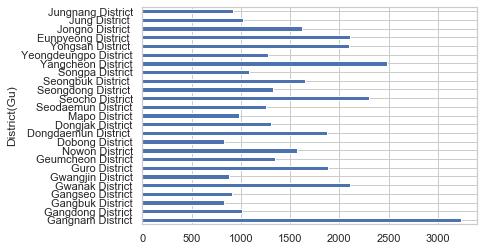

In [20]:
plt.figure()
data_result['Total'].plot(kind='barh', grid=True, figsize=(6,4))
plt.show()

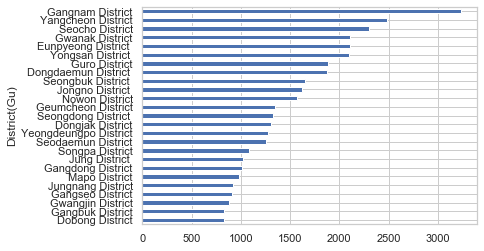

In [21]:
data_result['Total'].sort_values().plot(kind='barh', grid=True, figsize=(6,4))
plt.show()

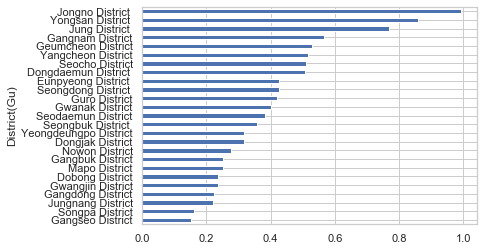

In [22]:
data_result['CCTV rate'] = data_result['Total'] / data_result['population'] * 100

data_result['CCTV rate'].sort_values().plot(kind='barh', grid=True, figsize=(6,4))
plt.show()

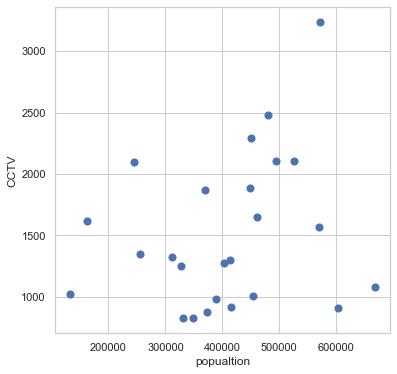

In [23]:
plt.figure(figsize=(6,6))
plt.scatter(data_result['population'], data_result['Total'], s=50)
plt.xlabel('popualtion')
plt.ylabel('CCTV')
plt.show()

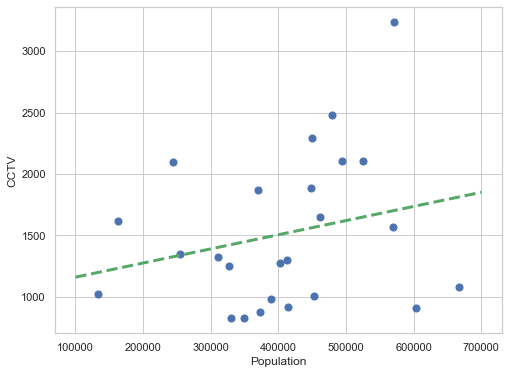

In [24]:
fp1 = np.polyfit(data_result['population'], data_result['Total'], 1)

f1 = np.poly1d(fp1)
fx = np.linspace(100000, 700000, 100)

plt.figure(figsize=(8,6))
plt.scatter(data_result['population'], data_result['Total'], s=50)
plt.plot(fx, f1(fx), ls='--', lw=3, c='g')
plt.xlabel('Population')
plt.ylabel('CCTV')
plt.show()

In [25]:
fp1 = np.polyfit(data_result['population'], data_result['Total'], 1)

f1 = np.poly1d(fp1)
fx = np.linspace(100000, 700000, 100)

data_result['error'] = np.abs(data_result['Total'] - f1(data_result['population']))

df_sort = data_result.sort_values(by='error', ascending=False)
df_sort.head()

,Total,3y growth rate,population,Korean,Foreigner,over 65,Foreigner rate,over 65 rate,CCTV rate,error
District(Gu),,,,,,,,,,
Gangnam District,3238,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217,0.567572,1535.448801
Yangcheon District,2482,34.671731,479978.0,475949.0,4029.0,52975.0,0.839413,11.036964,0.517107,883.686047
Gangseo District,911,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794,0.150885,829.864334
Yongsan District,2096,53.216374,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427,0.858302,769.183989
Songpa District,1081,104.347826,667483.0,660584.0,6899.0,72506.0,1.033584,10.862599,0.161952,733.228369


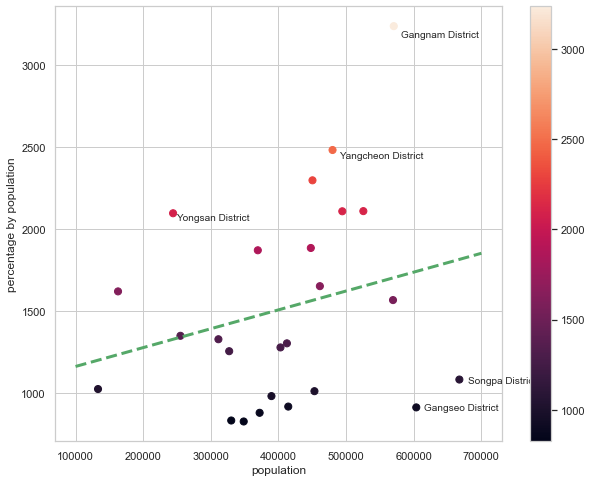

In [26]:
plt.figure(figsize=(10,8))
plt.scatter(data_result['population'], data_result['Total'],
           c = data_result['Total'], s = 50)
plt.plot(fx, f1(fx), ls='--', lw=3, c='g')

for n in range(5):
    plt.text(df_sort['population'][n]*1.02, df_sort['Total'][n]*0.98,
            df_sort.index[n], fontsize=10)
    
plt.xlabel('population')
plt.ylabel('percentage by population')
plt.colorbar()
plt.show()